In [14]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
from pathlib import Path

In [24]:
# reads file from path
path = Path("images")
if path.exists():
    img_files = [i for i in path.glob("**/*") if i.suffix == '.jpg']
else:
    print("Wrong path")

In [26]:
def file_to_img(file_list):
    """
    Reads all JPG files in directory 
    """
    img_list = []
    for k in file_list:
        img = Image.open(k)
        im_arr = np.array(img)
        img_list.append(im_arr)
    return img_list

In [35]:
def stack_images(array_list, *args):
    """
    Stacks list of array images
    """
    if args == 'mean':
        return np.mean(array_list, axis=0).astype('uint8')

    else:
        return np.median(array_list, axis=0).astype('uint8')

In [36]:
def save_image(rgb, format = 'JPG'):
    """
    Saves stacked image to jpg or tiff format.
    """
    if format == 'TIFF':
        Image.fromarray(rgb).save('image_stacked.tiff')
        print("Image saved in TIFF format")
    else:
        Image.fromarray(rgb).save('image_stacked.jpg', quality=90,
                                  optimize=True)
        print("Image saved in JPG format")

In [37]:
image_list = file_to_img(img_files)
rgb_img = stack_images(image_list)
save_image(rgb_img)

Image saved in JPG format


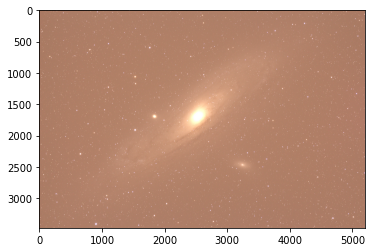

In [38]:
imshow(rgb_img)